# Analysis of Silver Mining Companies Stock Prices
***
In this notebook we will be comparing and analyzing five silver mining companies that are public on the Toronto Stock Exchange as well as the New York Stock Exchange. The companies are SilverCorp Metals (SVM), SilverCrest Metals (SIL), First Majestic Silver (FR), Fortuna Silver Mines (FVI) and Pan American Silver (PAAS). Our goal is to see if we can find a correlation between these companies and possibly even a correlation between them and the spot price of silver.  

## Table of Contents
***
1. [Comparing the Five Companies](#compare)
    
    * [2017 to the Present](#present)
        * [Getting the Data](#getData)
        * [Analyzing the Adjusted Close](#adjustedClose)
        * [Analyzing Volume Traded](#volume)
        * [Comapring Silver Spot Price](#silverSpot)
    
    * [2000 to 2013](#past)
        * [Getting the Data](#getDataPast)
        * [Analyzing the Adjusted Close](#adjustedClosePast)
        * [Comparing a Tighter Range](#tightRange)
        * [Analyzing Volume Traded](#volumePast)
        * [2008 Finicial Crisis](#financialCrisis)

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num
from matplotlib.ticker import FormatStrFormatter

C:\Users\Ben pickers\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


## Comparing the Five Companies
***
<a id='compare'></a>
Due to SilverCrest Metals being inactive from from 2013 to 2018, we will split our analysis into two ranges. The first range will be from July 1, 2018 to April 5, 2020. Then we'll go back in time and look at Janurary 1, 2000 to July 28, 2013 (the last day SIL was actively traded). 

## 2017 to the Present
<a id='present'></a>
### Getting the Data
<a id='getData'></a>
We will be using the TSX version of our stocks, and it will be from Yahoo Finance. Our data will include each days high, low, open, close, volume and adjusted close. All prices are listed in canadian dollars since we are using data for TSX listed stocks.

In [2]:
start = datetime.datetime(2018, 7, 1)
end = datetime.datetime(2020, 4, 5)

svm = web.DataReader('SVM.TO', 'yahoo', start, end)
sil = web.DataReader('SIL.TO', 'yahoo', start, end)
fr = web.DataReader('FR.TO', 'yahoo', start, end)
fvi = web.DataReader('FVI.TO', 'yahoo', start, end)
paas = web.DataReader('PAAS.TO', 'yahoo', start, end)

svm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-03,3.62,3.49,3.51,3.60,277300.0,3.559701
2018-07-04,3.64,3.57,3.64,3.59,88600.0,3.549813
2018-07-05,3.61,3.50,3.60,3.54,233600.0,3.500373
2018-07-06,3.61,3.51,3.52,3.59,122800.0,3.549813
2018-07-09,3.66,3.59,3.65,3.65,196700.0,3.609142


### Analyzing the Adjusted Close
<a id='adjustedClose'></a>
First, lets plot the adjusted close for each day. At first glance, we can see that PAAS closes alot higher than the other four stocks everyday. We can also see some similar peeks and valleys between all the stocks, most notably the sharp rise in july 2019 and the sharp drop that occured in febraury 2020.

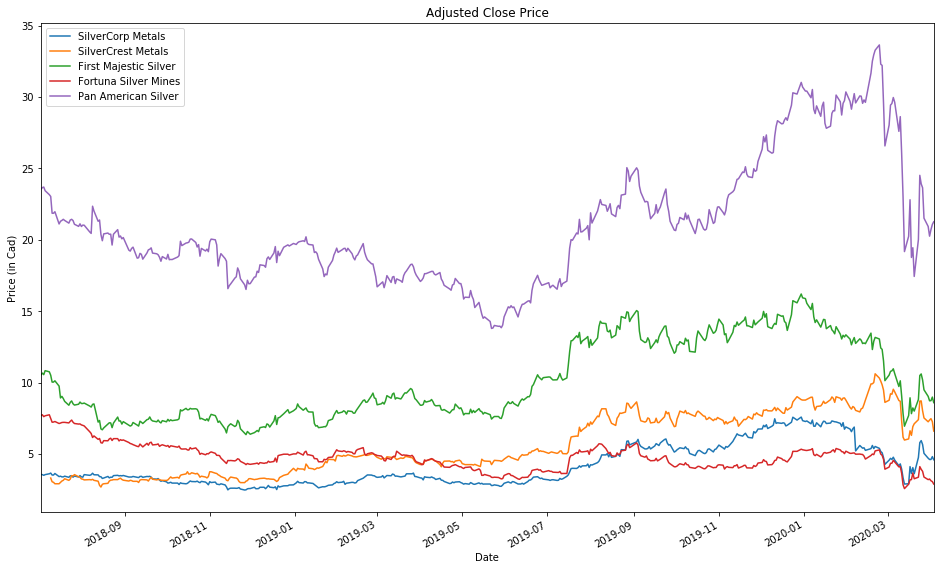

In [3]:
#Plot based on Closing prices
svm['Adj Close'].plot(label='SilverCorp Metals', figsize=(16,10), title='Adjusted Close Price')
sil['Adj Close'].plot(label='SilverCrest Metals')
fr['Adj Close'].plot(label='First Majestic Silver')
fvi['Adj Close'].plot(label='Fortuna Silver Mines')
paas['Adj Close'].plot(label='Pan American Silver')
plt.ylabel('Price (in Cad)')
plt.legend();

Now, lets take a look at the 50 day moving-average of each stocks adjusted close. We can more clearly see once again the bull run that happened for all of them in July of 2019.

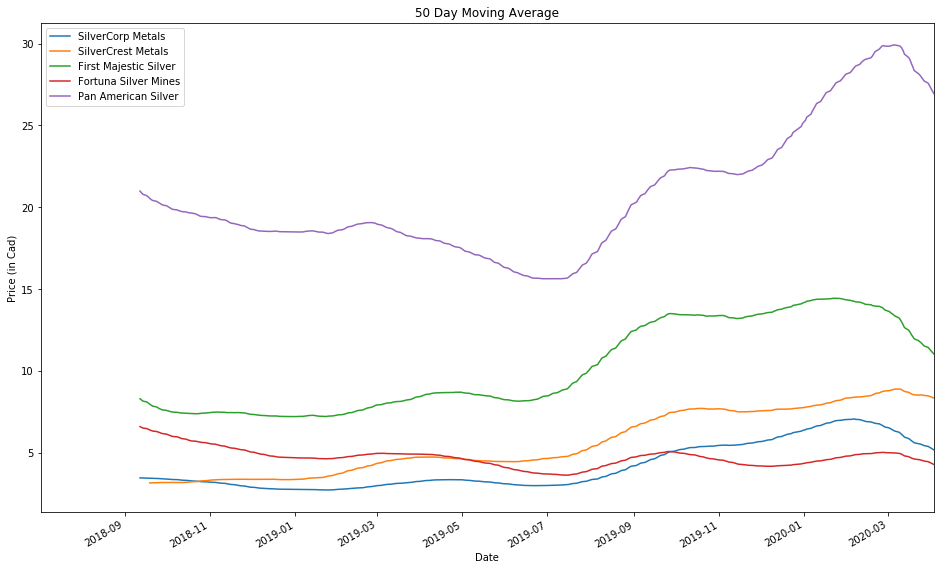

In [4]:
#Create new 50 day moving average column in each dataframe
svm['MA50'] = svm['Adj Close'].rolling(50).mean()
sil['MA50'] = sil['Adj Close'].rolling(50).mean()
fr['MA50'] = fr['Adj Close'].rolling(50).mean()
fvi['MA50'] = fvi['Adj Close'].rolling(50).mean()
paas['MA50'] = paas['Adj Close'].rolling(50).mean()

svm['MA50'].plot(label='SilverCorp Metals', figsize=(16,10), title='50 Day Moving Average')
sil['MA50'].plot(label='SilverCrest Metals')
fr['MA50'].plot(label='First Majestic Silver')
fvi['MA50'].plot(label='Fortuna Silver Mines')
paas['MA50'].plot(label='Pan American Silver')
plt.ylabel('Price (in Cad)')
plt.legend();

Lets directly look at the correlation between all of their adjusted closing prices. As suggested from the graphs above, we indeed do have a positive correlation between all of the stocks. PAAS seems to have the strongest correlation to the rest of the stocks, and SIL seems to have the weakest. The highest correlation being between PAAS and FR, and the lowest between.

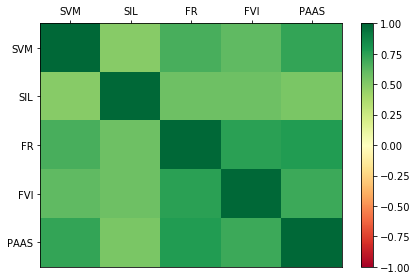

In [5]:
silver_close = pd.concat([svm['Adj Close'], sil['Adj Close'], fr['Adj Close'], fvi['Adj Close'], paas['Adj Close']], axis=1)
silver_close.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS']
silver_close = silver_close.pct_change()
silver_corr = silver_close.corr()

#Function creates a heatmap of the dataframe given
#Parameter: dataframe with the correlation of features already calculated
#This function will be used elsewhere in the notebook
def heat_map(corr):
    data = corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = corr.columns
    row_labels = corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    
heat_map(silver_corr)

In [6]:
silver_corr.head()

,SVM,SIL,FR,FVI,PAAS
SVM,1.000000,0.496640,0.673408,0.610155,0.728876
SIL,0.496640,1.000000,0.577677,0.572974,0.537664
FR,0.673408,0.577677,1.000000,0.750649,0.779429
FVI,0.610155,0.572974,0.750649,1.000000,0.705919
PAAS,0.728876,0.537664,0.779429,0.705919,1.000000


To get a closer look, lets make a scatter matrix. Once again, we see large tight groupings in PAAS, SVM, FR and FVI, and a more disperse, yet still distinct, shape for SIL.

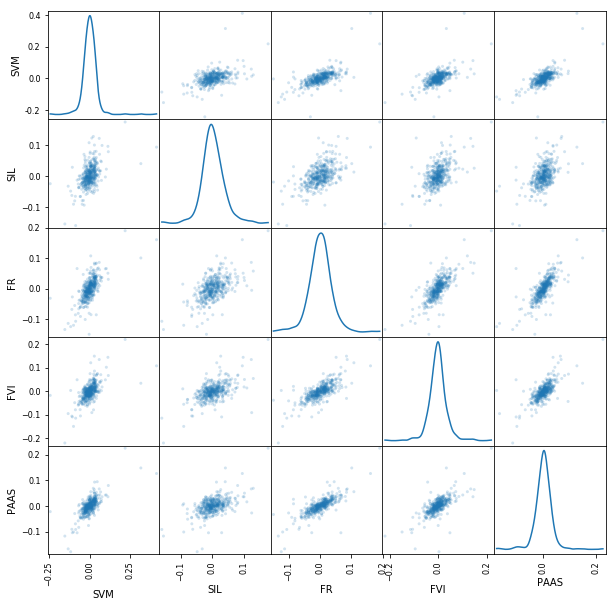

In [7]:
axes = scatter_matrix(silver_close, figsize=(10,10), alpha=0.2, diagonal='kde')

#Some floating point values in SVM needed to be rounded
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels);

### Analyzing Volume Traded
<a id='volume'></a>
So we have seen an obvious correlation in all five stocks adjusted close, but what about their daily volume traded? If they have similar peaks and valleys, do their volumes reflect that? Note that all five companies have a different amount of total stocks and they can be seen in the table below. Lets start by plotting each of theirs volumes.

<table style="float:left">
    <tr>
        <th></th>
        <th>SVM</th>
        <th>SIL</th>
        <th>FR</th>
        <th>FVI</th>
        <th>PAAS</th>
    </tr>
    <tr>
        <td>Total Shares (in millions)</td>
        <td>173</td>
        <td>110</td>
        <td>209</td>
        <td>160</td>
        <td>210</td>
    </tr>
</table>

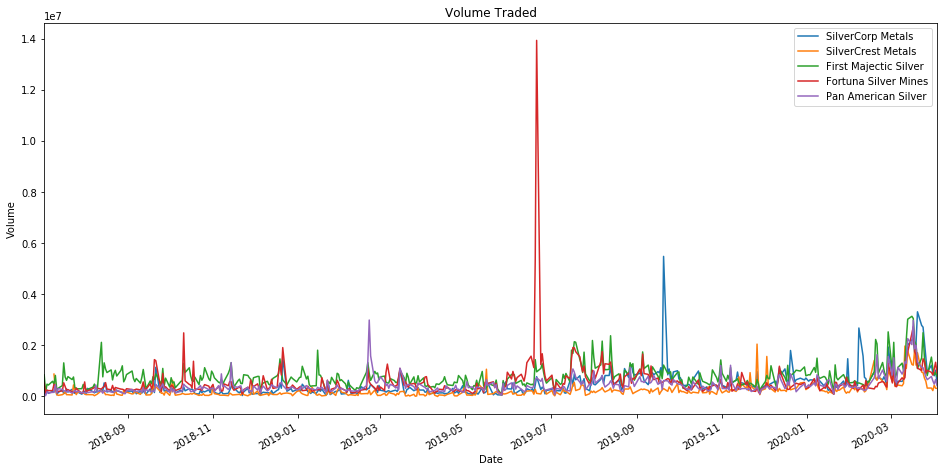

In [8]:
#Compare volume traded
svm['Volume'].plot(label='SilverCorp Metals', figsize=(16,8), title='Volume Traded')
sil['Volume'].plot(label='SilverCrest Metals')
fr['Volume'].plot(label='First Majectic Silver')
fvi['Volume'].plot(label='Fortuna Silver Mines')
paas['Volume'].plot(label='Pan American Silver')
plt.ylabel('Volume')
plt.legend();

At first glance it doesn't look like there is much correlation between their volumes traded, as most of there large volume peaks happen at different times. But looking closer, theres does seem to be some dates were there volumes traded spike together, most notably in February and March 2020. Lets take a closer look at the correlation between them.

In [14]:
#Function grabs the day with highest volume traded along with the daily high and low
#Parameter: dataframe with a volume column
#Return: dictionary containing max volume, the date and the high and low at that date
def getMaxVolume(df):
    max_volume = "{:,.0f}".format(df['Volume'].max())
    date = df['Volume'].idxmax().strftime("%b %d %Y")
    high = df.loc[df['Volume'].idxmax(), 'High']
    low = df.loc[df['Volume'].idxmax(), 'Low']
    
    return { 'max': max_volume, 'date': date, 'high': high, 'low': low}

#Function grabs the max volume data for all the stocks and stores it in a dictionary
#Parameter: Dictioanry of the stocks, where the value is the dataframe and key is the ticker
#Return: Dictionary of all their max volume data
#This function will be used elsewhere in the notebook
def createMaxVolumeDic(**kwargs):
    data_dict = {}
    
    for key, value in kwargs.items():
        maxVol = getMaxVolume(value)
        
        data_dict.update({key: [maxVol['max'], maxVol['date'], maxVol['high'], maxVol['low']]})
    return data_dict

data = createMaxVolumeDic(svm= svm, sil= sil, fr= fr, fvi= fvi, paas= paas)
df= pd.DataFrame(data, index= ['Max Volume', 'Date', 'High', 'Low'])
df

,svm,sil,fr,fvi,paas
Max Volume,"5,480,400","2,048,300","3,136,900","13,931,100","2,991,000"
Date,Sep 20 2019,Nov 26 2019,Mar 16 2020,Jun 21 2019,Feb 21 2019
High,5.9,7.93,8.15,3.9,19.14
Low,5.65,7.47,5.3,3.7,18.36


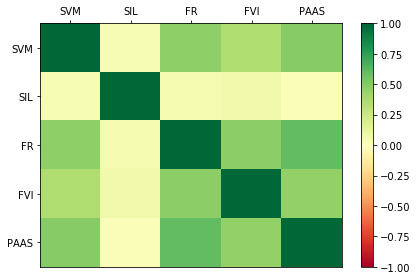

In [15]:
silver_volume = pd.concat([svm['Volume'], sil['Volume'], fr['Volume'], fvi['Volume'], paas['Volume']], axis=1)
silver_volume.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS']
silver_volume = silver_volume.pct_change()
silver_vol_corr = silver_volume.corr()

heat_map(silver_vol_corr)

As seen in the above heatmap theres a weaker correlation between SVM, FR, FVI and PAAS. What interesting though, is that SIL's volume seems to have no correlation to any of the others.

In [16]:
silver_vol_corr.head()

,SVM,SIL,FR,FVI,PAAS
SVM,1.000000,0.039700,0.469320,0.363648,0.494610
SIL,0.039700,1.000000,0.057513,0.072057,0.027694
FR,0.469320,0.057513,1.000000,0.476638,0.606542
FVI,0.363648,0.072057,0.476638,1.000000,0.459040
PAAS,0.494610,0.027694,0.606542,0.459040,1.000000


### Comparing Silver Spot Price
<a id='silverSpot'></a>
Now lets compare each of them to the silver spot price. The data we will be using is the monthly highs, lows and averages from the Perth Mint and we will be getting it from [quandl](https://www.quandl.com/data/PERTH/SLVR_USD_M-Silver-Spot-Prices-USD-Monthly). Note that this data is monthly data and it is in USD, so we will resample our current daily data to monthly averages and we will use percentage changes so currency shouldn't affect the outcome too much. 

In [17]:
sp = web.DataReader('PERTH/SLVR_USD_M', 'quandl', start, end, api_key='HN852weh2C8ymszNWadY')
sp.tail()

,BidHigh,AskHigh,BidLow,AskLow,BidAverage,AskAverage
Date,,,,,,
2018-11-30,14.64,14.91,13.84,14.09,14.24,14.51
2018-10-31,14.69,14.93,14.13,14.41,14.45,14.72
2018-09-30,14.41,14.68,13.93,14.18,14.12,14.39
2018-08-31,15.40,15.64,14.24,14.48,14.87,15.13
2018-07-31,16.03,16.31,15.11,15.39,15.61,15.88


Our spot price data consists of the ask and bid highs, lows and averages. We will only concern ourselves with the ask average, which can be seen plotted below.

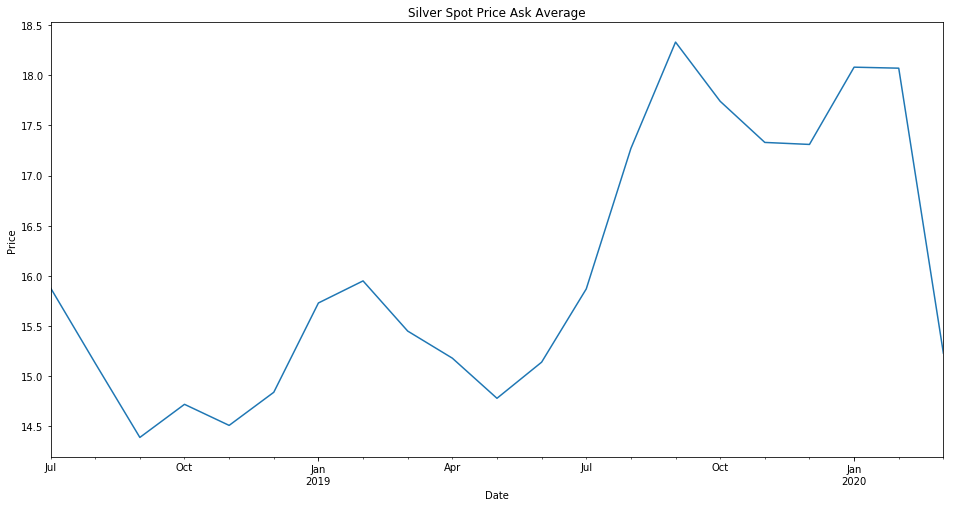

In [18]:
sp['AskAverage'].plot(figsize=(16, 8), title='Silver Spot Price Ask Average')
plt.ylabel('Price');

Lets resample our data and plot each of their precent change in adjust close versus the spot price's percent change in ask average.

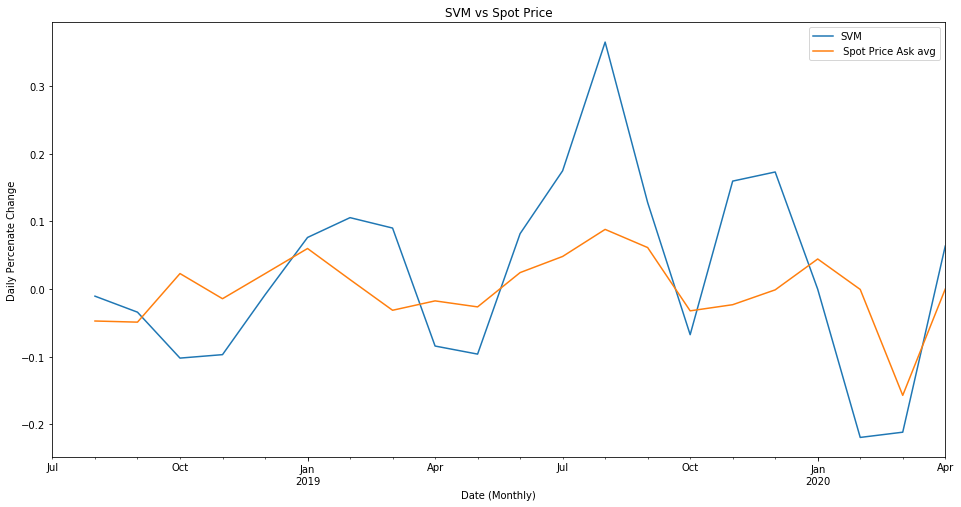

In [19]:
svm_resample = svm.resample('M').mean()
sil_resample = sil.resample('M').mean()
fr_resample = fr.resample('M').mean()
fvi_resample = fvi.resample('M').mean()
paas_resample = paas.resample('M').mean()

comp_spot = pd.concat([svm_resample['Adj Close'], sil_resample['Adj Close'], fr_resample['Adj Close'], fvi_resample['Adj Close'], paas_resample['Adj Close'], sp['AskAverage']], axis=1)
comp_spot.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS', 'Spot Ask']
comp_spot = comp_spot.pct_change()


comp_spot['SVM'].plot(label='SVM', figsize=(16,8), title='SVM vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

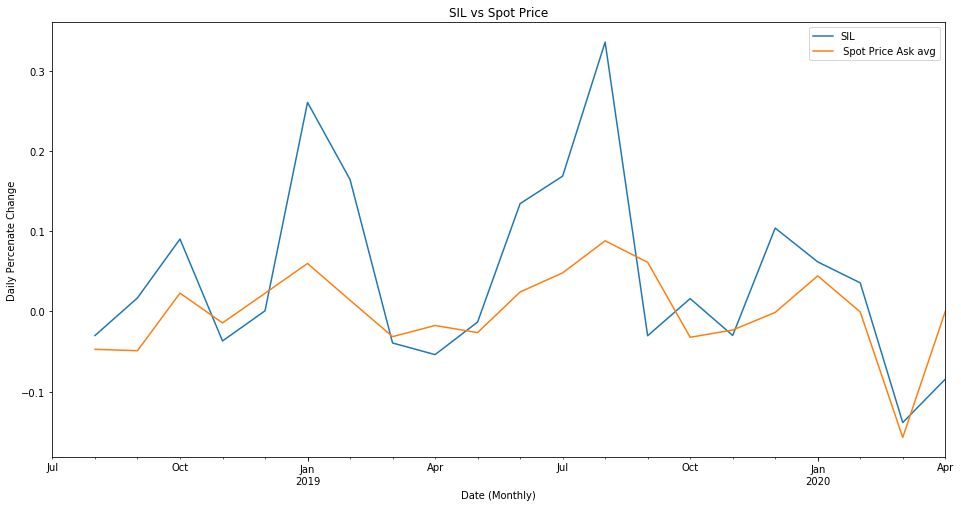

In [20]:
comp_spot['SIL'].plot(label='SIL', figsize=(16,8), title='SIL vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

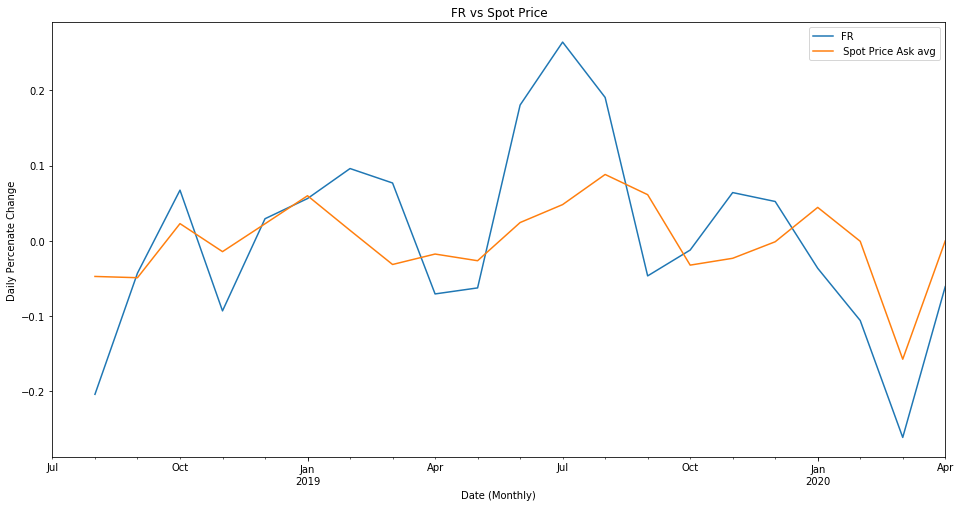

In [21]:
comp_spot['FR'].plot(label='FR', figsize=(16,8), title='FR vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

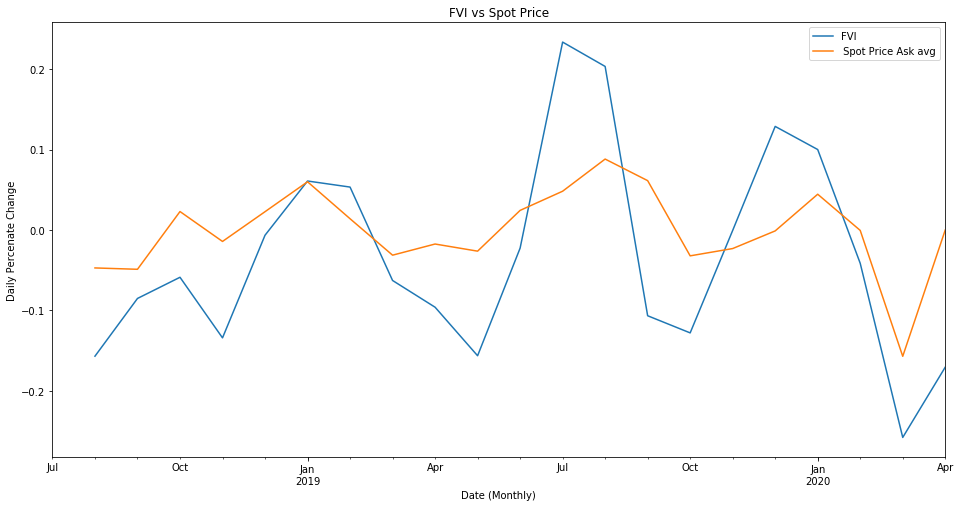

In [22]:
comp_spot['FVI'].plot(label='FVI', figsize=(16,8), title='FVI vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

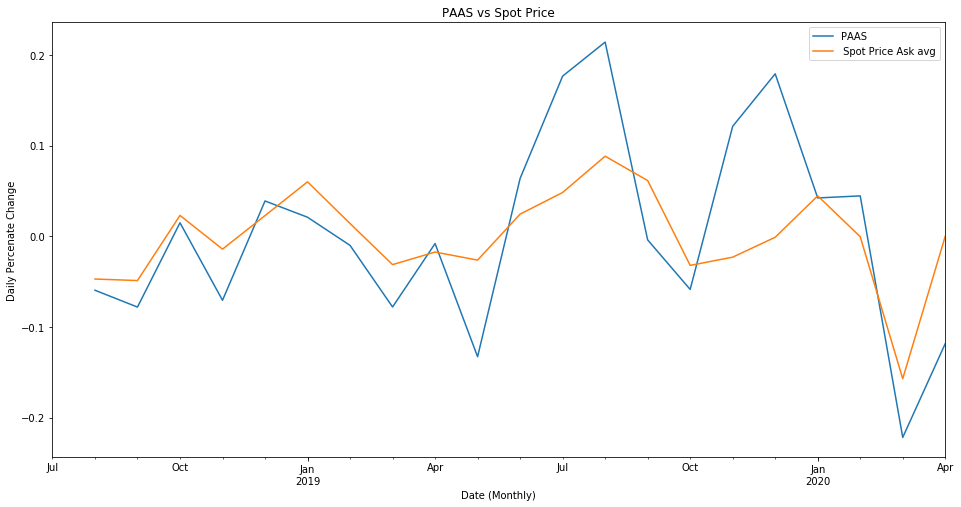

In [23]:
comp_spot['PAAS'].plot(label='PAAS', figsize=(16,8), title='PAAS vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

Taking a closer look at the plots, we can see three distinct peaks that occur in the spot price, as well as in the stocks, in January 2019, July 2019 and January 2020. There is also a very distinct valley seen in February/March 2020. Lets create a heat map of their correlation.

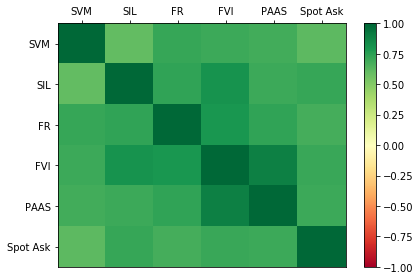

In [24]:
spot_corr = comp_spot.corr()

heat_map(spot_corr)

Looking at the Spot price column, it can be seen that there is a strong correlation between its ask average and the adjusted close of the silver stocks. It would be better if we could compare daily data instead of monthly averages to get more accurate information, but for what we have, we can say there is a correlation between the silver spot price and silver mining stocks.

As a side note, we do see a deeper correlation between the silver stocks when we look at them from a monthly view. The should be expected, as now we are looking at the distinct peaks and valleys over a larger time frame, so smaller peaks and valleys caused be high volatility aren't seen.

In [25]:
spot_corr

,SVM,SIL,FR,FVI,PAAS,Spot Ask
SVM,1.000000,0.607855,0.724447,0.703426,0.687555,0.618810
SIL,0.607855,1.000000,0.736145,0.819165,0.703766,0.723046
FR,0.724447,0.736145,1.000000,0.798892,0.737943,0.685548
FVI,0.703426,0.819165,0.798892,1.000000,0.894964,0.716608
PAAS,0.687555,0.703766,0.737943,0.894964,1.000000,0.706012
Spot Ask,0.618810,0.723046,0.685548,0.716608,0.706012,1.000000


## 2000 to 2013
<a id="past"></a>

We have taken a look at the correlation between these stocks and the silver spot price in present time, but what about in the past? Did these correlations exist back then, or is this something new? What about the 2008 finicial crisis, did all the stocks behave similarly? Lets compare them again, but this time with the range of January 1, 2000 to July 28, 2013 (this was the last day that SIL was traded on TSX before becoming active again in 2018).

### Getting the Data
<a id="getDataPast"></a>
Once again, we will grab our data from Yahoo Finance, with the time range being stated above as January 1, 2000 to July 28, 2013. The features of our dataset stay the same, so we have daily high, low, open, close, volume and adjusted close.

In [26]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2013, 7, 28)

svm_past = web.DataReader('SVM.TO', 'yahoo', start, end)
sil_past = web.DataReader('SIL.TO', 'yahoo', start, end)
fr_past = web.DataReader('FR.TO', 'yahoo', start, end)
fvi_past = web.DataReader('FVI.TO', 'yahoo', start, end)
paas_past = web.DataReader('PAAS.TO', 'yahoo', start, end)

svm_past.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,0.133333,0.133333,0.133333,0.133333,0.0,0.112643
2000-01-05,0.133333,0.133333,0.133333,0.133333,0.0,0.112643
2000-01-06,0.133333,0.133333,0.133333,0.133333,0.0,0.112643
2000-01-07,0.133333,0.133333,0.133333,0.133333,3900.0,0.112643
2000-01-10,0.133333,0.133333,0.133333,0.133333,3000.0,0.112643


### Analyzing the Adjusted Close
<a id="adjustedClosePast"></a>
First lets take a look at all of their adjusted closes before calculating their correlation.

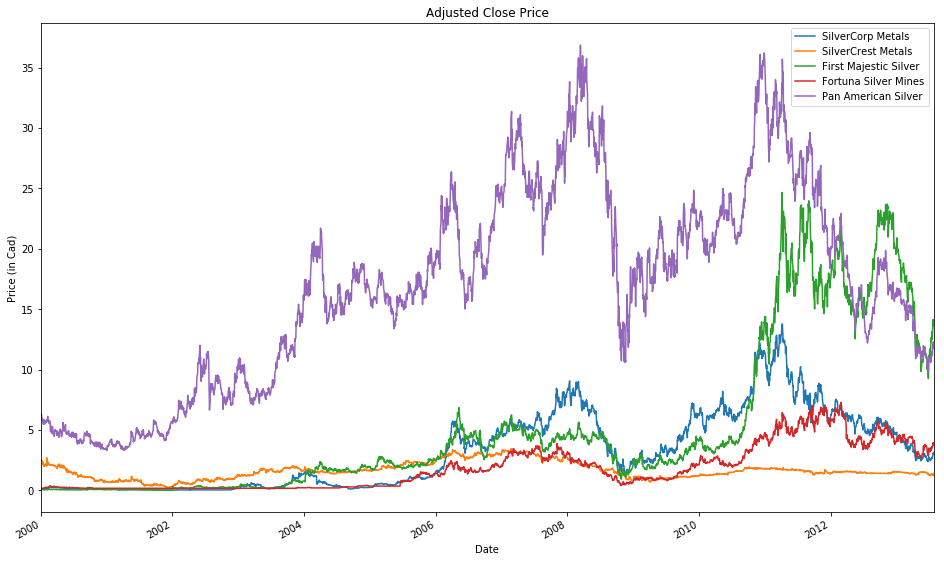

In [27]:
#Plot based on Closing prices
svm_past['Adj Close'].plot(label='SilverCorp Metals', figsize=(16,10), title='Adjusted Close Price')
sil_past['Adj Close'].plot(label='SilverCrest Metals')
fr_past['Adj Close'].plot(label='First Majestic Silver')
fvi_past['Adj Close'].plot(label='Fortuna Silver Mines')
paas_past['Adj Close'].plot(label='Pan American Silver')
plt.ylabel('Price (in Cad)')
plt.legend();

Looking at the plot above, we can see some similarities between the different stocks, but we can also see some periods where some of the stocks had little to no movement. SVM, SIL and FVI had very little movement from 2000 to about 2004. The sharp drop from the 2008 finicial crisis can be seen, with a couple of them bottoming at the same price (we will take a closer look at 2008 later on). Another intersting note, is that FR seems to come close to PAAS and even surpass it in 2012, as where in the more present data, FR stays well below PAAS and never passes it. 

Now lets calculate the correlation between all of them.

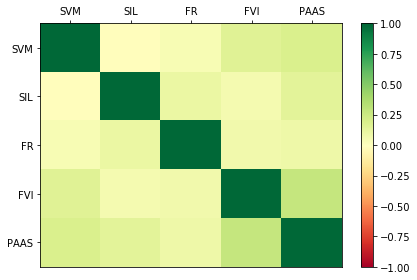

In [28]:
silver_past_close = pd.concat([svm_past['Adj Close'], sil_past['Adj Close'], fr_past['Adj Close'], fvi_past['Adj Close'], paas_past['Adj Close']], axis=1)
silver_past_close.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS']
silver_past_close = silver_past_close.pct_change()
silver_past_corr = silver_past_close.corr()

heat_map(silver_past_corr)

In a huge difference from the present data, there seems to be little to no correlation between all of them. This is most likely due to the low inactivity that occurred in some of the stocks in the early 2000's, and the fact that we are covering a much larger range of 13 years, rather than 2.

In [29]:
silver_past_corr.head()

,SVM,SIL,FR,FVI,PAAS
SVM,1.000000,-0.007832,0.044606,0.160533,0.190735
SIL,-0.007832,1.000000,0.104087,0.056299,0.144181
FR,0.044606,0.104087,1.000000,0.071772,0.089560
FVI,0.160533,0.056299,0.071772,1.000000,0.274883
PAAS,0.190735,0.144181,0.089560,0.274883,1.000000


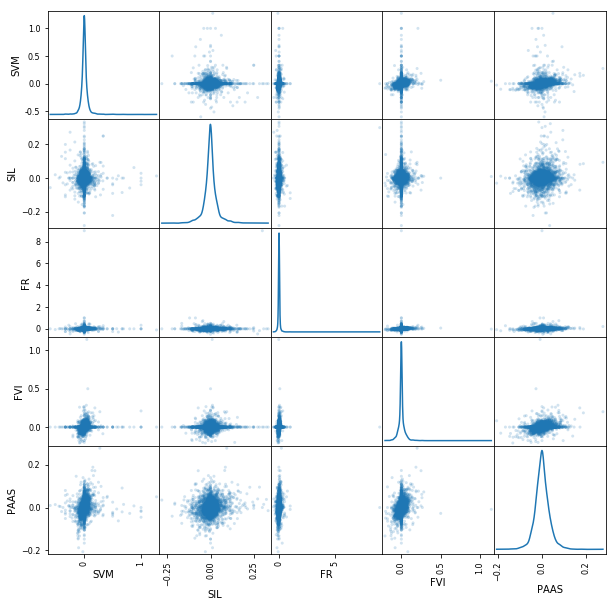

In [30]:
axes = scatter_matrix(silver_past_close, figsize=(10,10), alpha=0.2, diagonal='kde')

#Some floating point values in SVM needed to be rounded
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels);

Since there does seem to be a area of little to no volume traded for a couple of these companies, lets plot there daily volumes traded to get a better idea of what was happening.

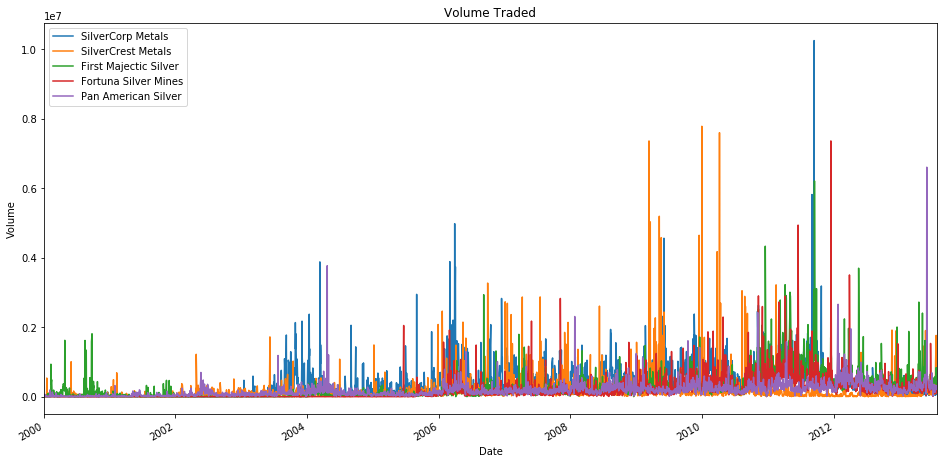

In [31]:
#Compare volume traded
svm_past['Volume'].plot(label='SilverCorp Metals', figsize=(16,8), title='Volume Traded')
sil_past['Volume'].plot(label='SilverCrest Metals')
fr_past['Volume'].plot(label='First Majectic Silver')
fvi_past['Volume'].plot(label='Fortuna Silver Mines')
paas_past['Volume'].plot(label='Pan American Silver')
plt.ylabel('Volume')
plt.legend();

### Comparing a Tighter Range
<a id="tightRange"></a>
As we thought, the only stocks with volume being traded in the early 2000's seem to be PAAS and FR. So, lets adjust our starting range to be January 1, 2006 instead of January 1, 2000.

In [32]:
#drop rows with date less than January 1, 2006 in each dataframe
start_date = pd.to_datetime('2006-01-01')

svm_past = svm_past.loc[svm_past.index >= start_date]
sil_past = sil_past.loc[sil_past.index >= start_date]
fr_past = fr_past.loc[fr_past.index >= start_date]
fvi_past= fvi_past.loc[fvi_past.index >= start_date]
paas_past = paas_past.loc[paas_past.index >= start_date]

svm_past.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,1.900000,1.800000,1.866667,1.896667,312300.0,1.602353
2006-01-04,1.933333,1.800000,1.900000,1.900000,684900.0,1.605169
2006-01-05,1.923333,1.823333,1.833333,1.923333,322500.0,1.624882
2006-01-06,2.000000,1.933333,1.936667,1.933333,555900.0,1.633330
2006-01-09,1.963333,1.820000,1.933333,1.960000,698400.0,1.655859


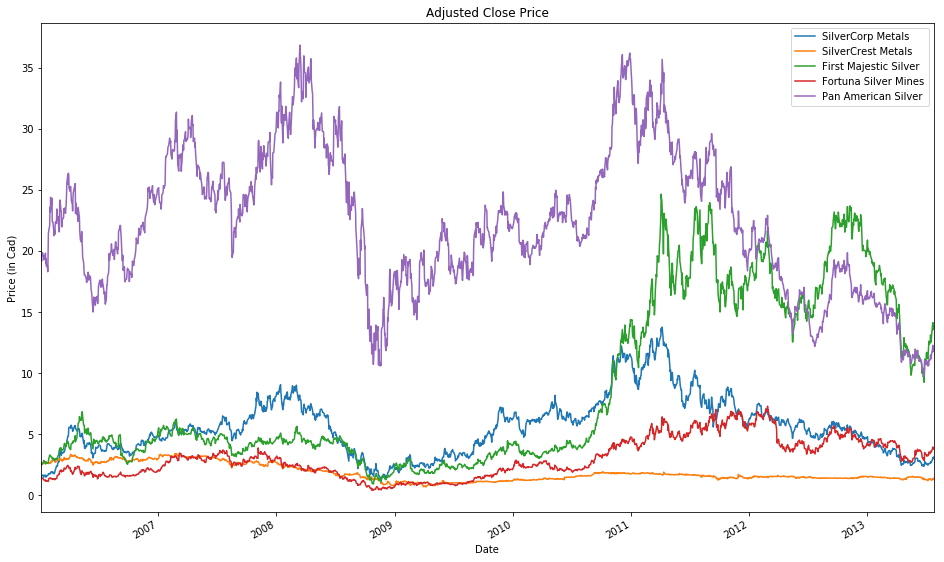

In [33]:
#Plot based on Closing prices
svm_past['Adj Close'].plot(label='SilverCorp Metals', figsize=(16,10), title='Adjusted Close Price')
sil_past['Adj Close'].plot(label='SilverCrest Metals')
fr_past['Adj Close'].plot(label='First Majestic Silver')
fvi_past['Adj Close'].plot(label='Fortuna Silver Mines')
paas_past['Adj Close'].plot(label='Pan American Silver')
plt.ylabel('Price (in Cad)')
plt.legend();

Now that we've adjusted our data, lets recalculate the correlation between the stocks.

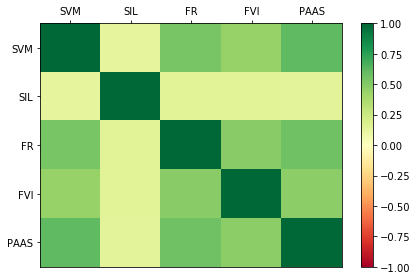

In [34]:
silver_past_close = pd.concat([svm_past['Adj Close'], sil_past['Adj Close'], fr_past['Adj Close'], fvi_past['Adj Close'], paas_past['Adj Close']], axis=1)
silver_past_close.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS']
silver_past_close = silver_past_close.pct_change()
silver_past_corr = silver_past_close.corr()

heat_map(silver_past_corr)

As suspected, with a tighter range we do see a moderate positive correlation between FVI and SVM, FR and PAAS, as well as a strong correlation between SVM, FR and PAAS. SIL seems to be the outlier again with only a weak correlation to the others. Looking at the adjusted close plot above, it looks as if SIL closing price doesn't change much at all. Lets create a scatter matrix and also plot SIL's percent change in adjusted close to see if this is true.

In [35]:
silver_past_corr.head()

,SVM,SIL,FR,FVI,PAAS
SVM,1.000000,0.130104,0.543603,0.448554,0.613140
SIL,0.130104,1.000000,0.154600,0.153815,0.141603
FR,0.543603,0.154600,1.000000,0.488519,0.562624
FVI,0.448554,0.153815,0.488519,1.000000,0.479567
PAAS,0.613140,0.141603,0.562624,0.479567,1.000000


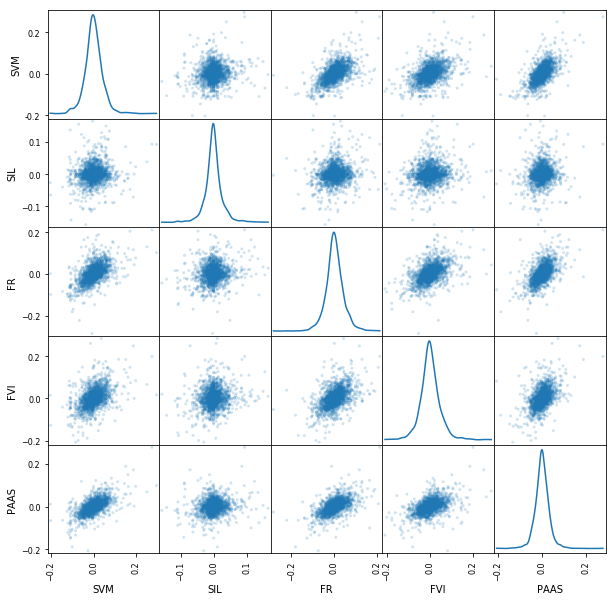

In [36]:
axes = scatter_matrix(silver_past_close, figsize=(10,10), alpha=0.2, diagonal='kde')

#Some floating point values in SVM needed to be rounded
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels);

After plotting SIL's percent change, we can see some periods where the price changes by very little and sometimes by nothing. Most notably in 2009, there seems to be a period where the closing price doesn't change at all, and in 2012 there are a couple of months where the closing price only changes by a percent less than five.

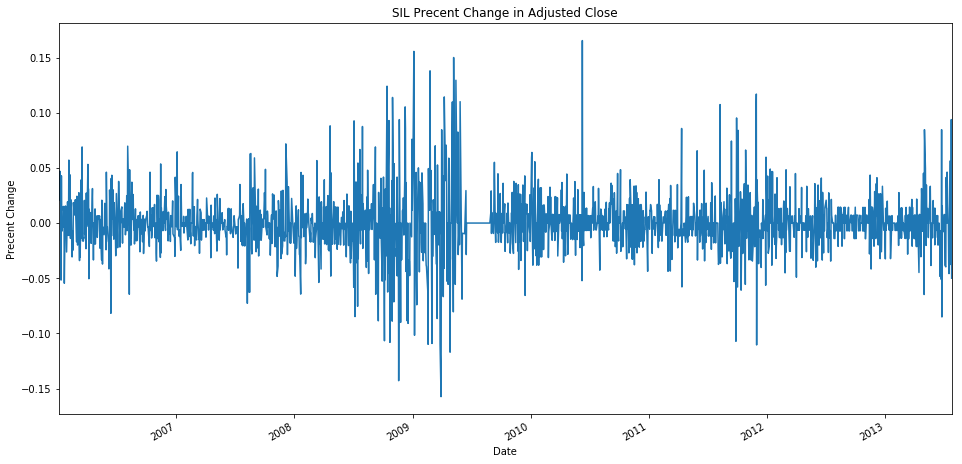

In [37]:
silver_past_close['SIL'].plot(figsize=(16, 8), title='SIL Precent Change in Adjusted Close')
plt.ylabel('Precent Change');

### Analyzing Volume Traded
<a id="volumePast"></a>
So we've seen that theres a moderate correlation between four of the five stocks, but what about their daily volumes traded? Is there any correlation between how often these stocks are traded? Lets start by plotting all of their volumes traded.

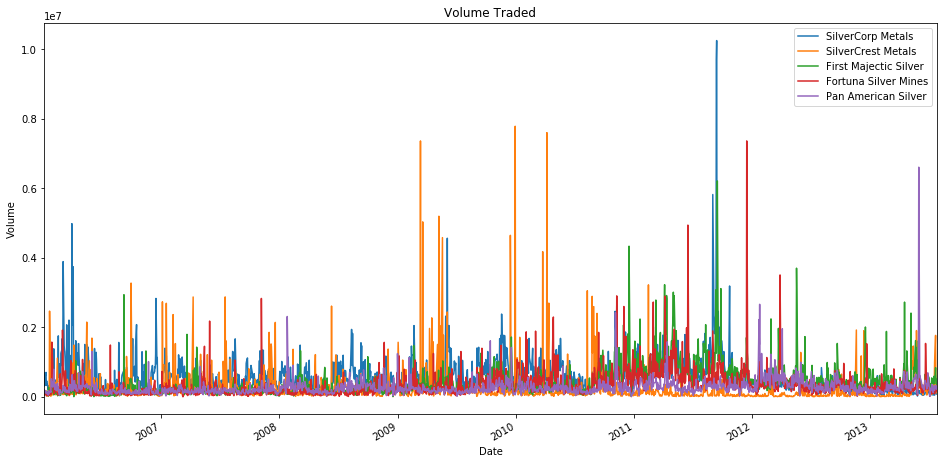

In [38]:
#Compare volume traded
svm_past['Volume'].plot(label='SilverCorp Metals', figsize=(16,8), title='Volume Traded')
sil_past['Volume'].plot(label='SilverCrest Metals')
fr_past['Volume'].plot(label='First Majectic Silver')
fvi_past['Volume'].plot(label='Fortuna Silver Mines')
paas_past['Volume'].plot(label='Pan American Silver')
plt.ylabel('Volume')
plt.legend();

Looking at the volume traded plot above, we see a large increase in the volume traded around 2009 and 2011, when the large recovery from the 2008 finicial crisis happened. SVM, FR and FVI all had their max volumes traded occur in 2011 and SIL's max was in 2009 (all this data can be seen in the table bellow). 

There does seem to be some similar groupings of volume traded in the 2009-2012 range. So lets look closer at the correlation between the volumes traded with a heatmap.

In [41]:
#Create a dataframe for the day that each stock had there max volume of shares traded
data = createMaxVolumeDic(svm=svm_past, sil=sil_past, fr=fr_past, fvi=fvi_past, paas=paas_past)
df= pd.DataFrame(data, index= ['Max Volume', 'Date', 'High', 'Low'])
df

,svm,sil,fr,fvi,paas
Max Volume,"10,256,000","7,787,654","6,212,800","7,365,600","6,608,500"
Date,Sep 14 2011,Dec 30 2009,Sep 16 2011,Dec 16 2011,May 31 2013
High,7.42,1.21,20.69,5.96,13.24
Low,5.81,1.17,19.81,5.66,11.91


In [ ]:
silver_past_volume = pd.concat([svm_past['Volume'], sil_past['Volume'], fr_past['Volume'], fvi_past['Volume'], paas_past['Volume']], axis=1)
silver_past_volume.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS']
silver_past_volume = silver_past_volume.pct_change()
silver_past_vol_corr = silver_past_volume.corr()

heat_map(silver_past_vol_corr)

From the heatmap above, we get a strong positive correlation between SVM, FR and PAAS (similar to there adjusted close correlation). SIL and FVI have weak correlations or no correaltion to the other stocks. Exact values can be seen below in the table.

In [ ]:
silver_past_vol_corr

## 2008 Financial Crisis
<a id="financialCrisis"></a>